## Setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


## Data

In [3]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [3]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Plotting

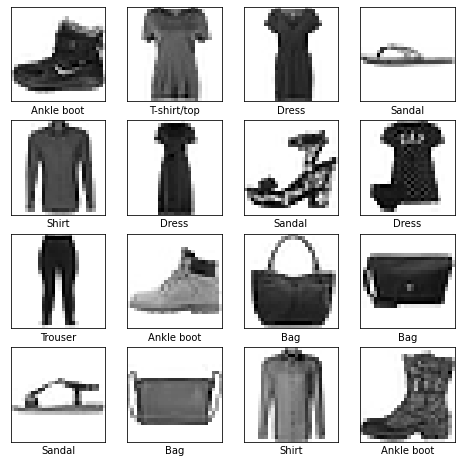

In [4]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), clothes_labels[y_train[i]])


## Dense Neural Network

In [4]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

In [6]:
y_train[0]

9

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)), # prevod na jednu snuru cisel
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax') # zaverecny layer, mame 10 kategorii
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(), # nieco default, nehrab sa v tom
                  metrics=['accuracy'])

dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = dnn_model.fit( # fitova / uciaca sa metoda, samotna validacia
  x_train, y_train,
  batch_size = 256, # kolko obrazkov naraz sa vezme v kazdom kroku, cim vacsie tym rychlejsie ale narocne na GPU -> padne to
  epochs = 20, # kolkokrat sa pozrie na kazdy obrazok, 20-krat prejde cely proces na rovnakych batch
  validation_data = (x_test, y_test),
  verbose = 1
) 

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.5989 - accuracy: 0.7923 - val_loss: 0.4861 - val_accuracy: 0.8305
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4151 - accuracy: 0.8542 - val_loss: 0.4328 - val_accuracy: 0.8450
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3717 - accuracy: 0.8672 - val_loss: 0.4062 - val_accuracy: 0.8562
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3464 - accuracy: 0.8752 - val_loss: 0.3739 - val_accuracy: 0.8652
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3230 - accuracy: 0.8825 - val_loss: 0.3667 - val_accuracy: 0.8686
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3110 - accuracy: 0.8864 - val_loss: 0.3684 - val_accuracy: 0.8698
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2925 - accuracy: 0.8927 - val_loss: 0.3533 - val_accuracy: 0.8758
Epoch 

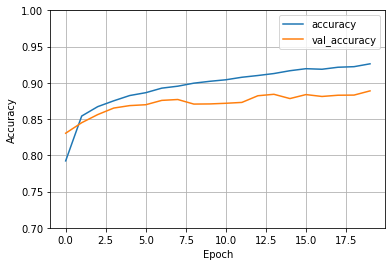

In [18]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

In [19]:
history2 = dnn_model.fit( 
  x_train, y_train,
  batch_size = 512, 
  epochs = 20, 
  validation_data = (x_test, y_test),
  verbose = 1
)  # 20 s

Epoch 1/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1783 - accuracy: 0.9349 - val_loss: 0.3327 - val_accuracy: 0.8895
Epoch 2/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1749 - accuracy: 0.9359 - val_loss: 0.3286 - val_accuracy: 0.8892
Epoch 3/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1711 - accuracy: 0.9379 - val_loss: 0.3306 - val_accuracy: 0.8866
Epoch 4/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1686 - accuracy: 0.9378 - val_loss: 0.3353 - val_accuracy: 0.8862
Epoch 5/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1662 - accuracy: 0.9388 - val_loss: 0.3378 - val_accuracy: 0.8869
Epoch 6/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1619 - accuracy: 0.9404 - val_loss: 0.3394 - val_accuracy: 0.8896
Epoch 7/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1596 - accuracy: 0.9420 - val_loss: 0.3314 - val_accuracy: 0.8950
Epoch 

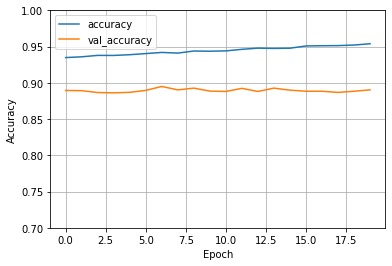

In [20]:
plot_loss(history2, ylim=(0.7, 1))

# od zaciatku lepsie val_accuracy (okolo 89%), ale velmi sa nezlepsilo, stacilo by menej epoch
# accuracy tiez od zaciatku dobre, celkovo sa zlepsilo o cca 2%

In [21]:
history3 = dnn_model.fit( 
  x_train, y_train,
  batch_size = 128, 
  epochs = 20, 
  validation_data = (x_test, y_test),
  verbose = 1
) # 41 s

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2138 - accuracy: 0.9199 - val_loss: 0.3879 - val_accuracy: 0.8853
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1795 - accuracy: 0.9325 - val_loss: 0.3886 - val_accuracy: 0.8813
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1679 - accuracy: 0.9360 - val_loss: 0.3886 - val_accuracy: 0.8843
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1609 - accuracy: 0.9394 - val_loss: 0.3888 - val_accuracy: 0.8865
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1561 - accuracy: 0.9403 - val_loss: 0.4091 - val_accuracy: 0.8808
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1487 - accuracy: 0.9446 - val_loss: 0.3846 - val_accuracy: 0.8864
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1489 - accuracy: 0.9438 - val_loss: 0.4006 - val_accuracy: 0.8807
Epoch 

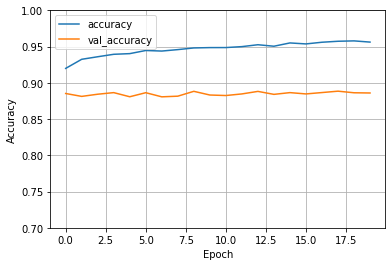

In [22]:
plot_loss(history3, ylim=(0.7, 1))

# vyraznejsie zlepsenie oproti zaciatku nez pri batch = 512, ale 2x pomalsie
# konecna accuracy je porovnatelna

In [23]:
dnn_model2 = keras.Sequential([
      layers.Flatten(input_shape=(28,28)), 
      layers.Dense(256, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax') 
])

dnn_model2.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(), 
                  metrics=['accuracy'])

dnn_model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = dnn_model2.fit( 
  x_train, y_train,
  batch_size = 256, 
  epochs = 20, 
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.5551 - accuracy: 0.8065 - val_loss: 0.4413 - val_accuracy: 0.8426
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3833 - accuracy: 0.8621 - val_loss: 0.4028 - val_accuracy: 0.8575
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3406 - accuracy: 0.8778 - val_loss: 0.3889 - val_accuracy: 0.8621
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3180 - accuracy: 0.8848 - val_loss: 0.3603 - val_accuracy: 0.8695
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2961 - accuracy: 0.8918 - val_loss: 0.3442 - val_accuracy: 0.8762
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2777 - accuracy: 0.8985 - val_loss: 0.3255 - val_accuracy: 0.8850
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2673 - accuracy: 0.9011 - val_loss: 0.3615 - val_accuracy: 0.8747
Epoch 

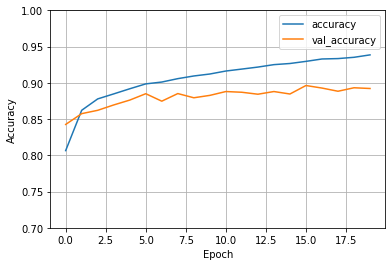

In [25]:
plot_loss(history, ylim=(0.7, 1))

# porovnatelne s 1. modelom

In [26]:
dnn_model3 = keras.Sequential([
      layers.Flatten(input_shape=(28,28)), 
      layers.Dense(100, activation='relu'),
      layers.Dense(50, activation='relu'),
      layers.Dense(10, activation='softmax') 
])

dnn_model3.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(), 
                  metrics=['accuracy'])

dnn_model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = dnn_model3.fit( 
  x_train, y_train,
  batch_size = 256, 
  epochs = 20, 
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.6448 - accuracy: 0.7809 - val_loss: 0.5129 - val_accuracy: 0.8178
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4259 - accuracy: 0.8508 - val_loss: 0.4278 - val_accuracy: 0.8459
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3839 - accuracy: 0.8635 - val_loss: 0.4096 - val_accuracy: 0.8541
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3565 - accuracy: 0.8724 - val_loss: 0.3846 - val_accuracy: 0.8607
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3389 - accuracy: 0.8783 - val_loss: 0.3759 - val_accuracy: 0.8633
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3199 - accuracy: 0.8833 - val_loss: 0.3682 - val_accuracy: 0.8675
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3086 - accuracy: 0.8891 - val_loss: 0.3672 - val_accuracy: 0.8671
Epoch 

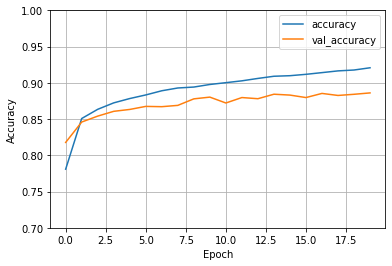

In [28]:
plot_loss(history, ylim=(0.7, 1))

In [29]:
history5 = dnn_model3.fit( 
  x_train, y_train,
  batch_size = 512, 
  epochs = 20, 
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1984 - accuracy: 0.9265 - val_loss: 0.3213 - val_accuracy: 0.8884
Epoch 2/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1955 - accuracy: 0.9280 - val_loss: 0.3225 - val_accuracy: 0.8907
Epoch 3/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1925 - accuracy: 0.9294 - val_loss: 0.3331 - val_accuracy: 0.8866
Epoch 4/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1907 - accuracy: 0.9311 - val_loss: 0.3299 - val_accuracy: 0.8886
Epoch 5/20
118/118 [==============================] - 1s 6ms/step - loss: 0.1864 - accuracy: 0.9325 - val_loss: 0.3332 - val_accuracy: 0.8860
Epoch 6/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1842 - accuracy: 0.9329 - val_loss: 0.3252 - val_accuracy: 0.8901
Epoch 7/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1826 - accuracy: 0.9331 - val_loss: 0.3337 - val_accuracy: 0.8890
Epoch 

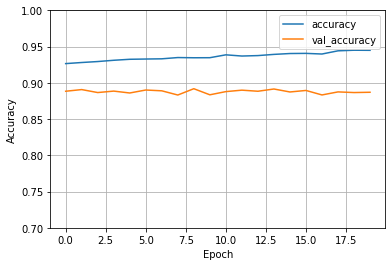

In [30]:
plot_loss(history5, ylim=(0.7, 1))

## Convolutional Neural Network

In [31]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [32]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
) # 2 min

Epoch 1/20
235/235 [==============================] - 33s 23ms/step - loss: 0.6260 - accuracy: 0.7755 - val_loss: 0.3979 - val_accuracy: 0.8562
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.4084 - accuracy: 0.8530 - val_loss: 0.3435 - val_accuracy: 0.8773
Epoch 3/20
235/235 [==============================] - 5s 21ms/step - loss: 0.3608 - accuracy: 0.8728 - val_loss: 0.3102 - val_accuracy: 0.8873
Epoch 4/20
235/235 [==============================] - 5s 21ms/step - loss: 0.3224 - accuracy: 0.8827 - val_loss: 0.2911 - val_accuracy: 0.8933
Epoch 5/20
235/235 [==============================] - 5s 21ms/step - loss: 0.3010 - accuracy: 0.8902 - val_loss: 0.2776 - val_accuracy: 0.8987
Epoch 6/20
235/235 [==============================] - 5s 21ms/step - loss: 0.2792 - accuracy: 0.8960 - val_loss: 0.2765 - val_accuracy: 0.8977
Epoch 7/20
235/235 [==============================] - 5s 21ms/step - loss: 0.2622 - accuracy: 0.9039 - val_loss: 0.2601 - val_accuracy: 0.903

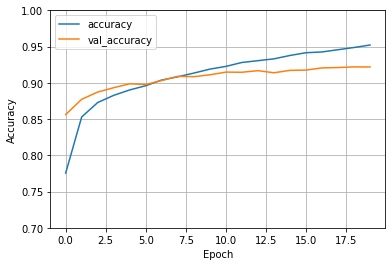

In [33]:
plot_loss(history, ylim=(0.7, 1))

In [34]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 512,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
) # 2 min

Epoch 1/20
118/118 [==============================] - 5s 38ms/step - loss: 0.1140 - accuracy: 0.9565 - val_loss: 0.2602 - val_accuracy: 0.9212
Epoch 2/20
118/118 [==============================] - 4s 37ms/step - loss: 0.1047 - accuracy: 0.9600 - val_loss: 0.2667 - val_accuracy: 0.9237
Epoch 3/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0998 - accuracy: 0.9615 - val_loss: 0.2652 - val_accuracy: 0.9228
Epoch 4/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0963 - accuracy: 0.9634 - val_loss: 0.2758 - val_accuracy: 0.9224
Epoch 5/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0921 - accuracy: 0.9649 - val_loss: 0.2726 - val_accuracy: 0.9237
Epoch 6/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0907 - accuracy: 0.9654 - val_loss: 0.2750 - val_accuracy: 0.9253
Epoch 7/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0863 - accuracy: 0.9667 - val_loss: 0.2810 - val_accuracy: 0.9250

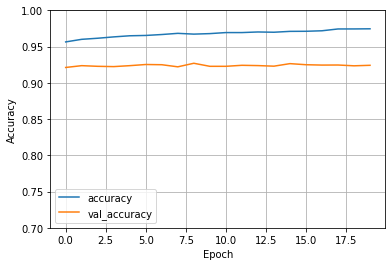

In [35]:
plot_loss(history, ylim=(0.7, 1))

# lepsi zaciatok, staci menej validacii
# koniec: val_acc +- rovnaka, acc trochu nizsia

In [36]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 128,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1179 - accuracy: 0.9553 - val_loss: 0.2968 - val_accuracy: 0.9149
Epoch 2/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1071 - accuracy: 0.9597 - val_loss: 0.3152 - val_accuracy: 0.9147
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1001 - accuracy: 0.9614 - val_loss: 0.2969 - val_accuracy: 0.9203
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0930 - accuracy: 0.9650 - val_loss: 0.3083 - val_accuracy: 0.9213
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0875 - accuracy: 0.9668 - val_loss: 0.3224 - val_accuracy: 0.9215
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0838 - accuracy: 0.9675 - val_loss: 0.3265 - val_accuracy: 0.9179
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0836 - accuracy: 0.9677 - val_loss: 0.3226 - val_accuracy: 0.9203

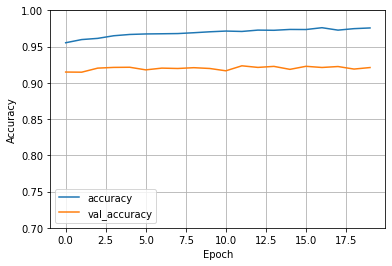

In [37]:
plot_loss(history, ylim=(0.7, 1))

# rovako rychle ako s batch = 512, podobne vysledky

In [44]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.2),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_7 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [39]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 6s 23ms/step - loss: 0.5222 - accuracy: 0.8142 - val_loss: 0.3625 - val_accuracy: 0.8673
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.3270 - accuracy: 0.8801 - val_loss: 0.3399 - val_accuracy: 0.8767
Epoch 3/20
235/235 [==============================] - 5s 21ms/step - loss: 0.2721 - accuracy: 0.9006 - val_loss: 0.2739 - val_accuracy: 0.9010
Epoch 4/20
235/235 [==============================] - 5s 21ms/step - loss: 0.2350 - accuracy: 0.9124 - val_loss: 0.2664 - val_accuracy: 0.9058
Epoch 5/20
235/235 [==============================] - 5s 21ms/step - loss: 0.2015 - accuracy: 0.9257 - val_loss: 0.2551 - val_accuracy: 0.9083
Epoch 6/20
235/235 [==============================] - 5s 22ms/step - loss: 0.1785 - accuracy: 0.9340 - val_loss: 0.2415 - val_accuracy: 0.9131
Epoch 7/20
235/235 [==============================] - 5s 21ms/step - loss: 0.1522 - accuracy: 0.9445 - val_loss: 0.2449 - val_accuracy: 0.9131

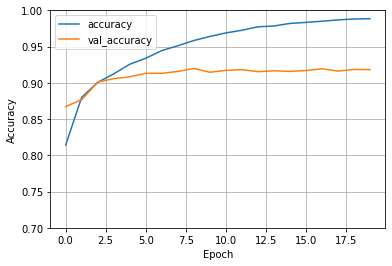

In [40]:
plot_loss(history, ylim=(0.7, 1)) 

# rychlejsie, cca 1 min -> mensi dropout
# nizka pociatocna accuracy, konecne hodnoty porovnatelne s predch. -> potrebuje vsetkych 20 epoch

In [48]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 512,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
118/118 [==============================] - 4s 38ms/step - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.4423 - val_accuracy: 0.9206
Epoch 2/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.4497 - val_accuracy: 0.9226
Epoch 3/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.4604 - val_accuracy: 0.9201
Epoch 4/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.4756 - val_accuracy: 0.9211
Epoch 5/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.4818 - val_accuracy: 0.9216
Epoch 6/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.4855 - val_accuracy: 0.9197
Epoch 7/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.4934 - val_accuracy: 0.9211

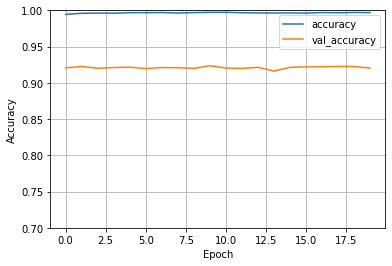

In [49]:
plot_loss(history, ylim=(0.7, 1))

# prefitovane, acc je takmer 100%, val_acc okolo 92%

In [50]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (5,5), activation = 'relu'),
      layers.Dropout(0.7),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.7),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               1982592   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)               

In [51]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
) # 1.5 min

Epoch 1/20
235/235 [==============================] - 6s 21ms/step - loss: 0.8054 - accuracy: 0.7089 - val_loss: 0.4712 - val_accuracy: 0.8343
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.5525 - accuracy: 0.8002 - val_loss: 0.4108 - val_accuracy: 0.8471
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.4899 - accuracy: 0.8240 - val_loss: 0.3681 - val_accuracy: 0.8663
Epoch 4/20
235/235 [==============================] - 5s 20ms/step - loss: 0.4538 - accuracy: 0.8379 - val_loss: 0.3377 - val_accuracy: 0.8790
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.4249 - accuracy: 0.8460 - val_loss: 0.3217 - val_accuracy: 0.8848
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.4005 - accuracy: 0.8552 - val_loss: 0.3125 - val_accuracy: 0.8865
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.3825 - accuracy: 0.8618 - val_loss: 0.3073 - val_accuracy: 0.8875

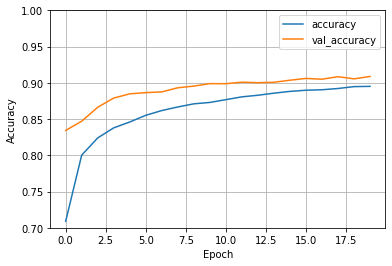

In [52]:
plot_loss(history, ylim=(0.7, 1))
# val_acc je vacsia ako acc -> zrejme privelke sito a dropout rate

In [53]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (5,5), activation = 'relu'),
      layers.Dropout(0.2),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
flatten_9 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               1982592   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

In [54]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 6s 21ms/step - loss: 0.6129 - accuracy: 0.7831 - val_loss: 0.3984 - val_accuracy: 0.8547
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.4052 - accuracy: 0.8564 - val_loss: 0.3437 - val_accuracy: 0.8733
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.3499 - accuracy: 0.8749 - val_loss: 0.3020 - val_accuracy: 0.8897
Epoch 4/20
235/235 [==============================] - 5s 20ms/step - loss: 0.3126 - accuracy: 0.8877 - val_loss: 0.2902 - val_accuracy: 0.8947
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.2874 - accuracy: 0.8950 - val_loss: 0.2689 - val_accuracy: 0.9004
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.2661 - accuracy: 0.9026 - val_loss: 0.2651 - val_accuracy: 0.9039
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.2490 - accuracy: 0.9078 - val_loss: 0.2554 - val_accuracy: 0.9074

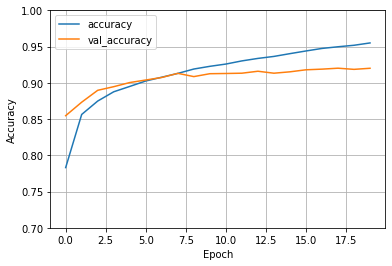

In [55]:
plot_loss(history, ylim=(0.7, 1))